# Chapter 2 Figures

This notebook shows the code behind the figures in Chapter 2: Background.

In [ ]:
!pip install torch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, DotProduct, Product, Sum
from numpy.linalg import inv

### Supervised Learning plot

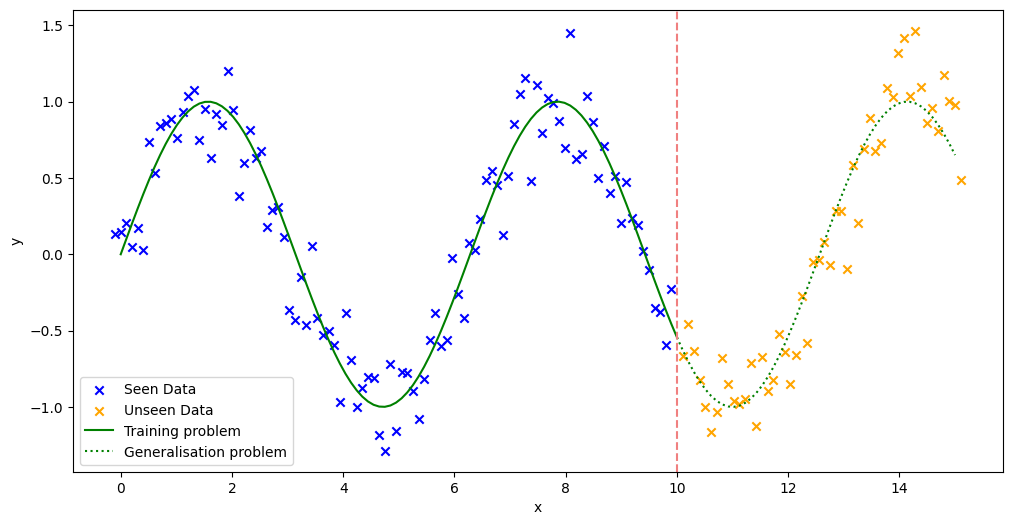

In [ ]:
x_train = np.linspace(0, 10, 100)
y_train = np.sin(x_train) + np.random.normal(0, 0.2, 100)
# ax[0].scatter(x_train, y_train, color='blue', label='Seen Data (Training)', marker = 'x')
# ax[0].plot(x_train, np.sin(x_train), color='green', label='Model on Seen Data')
# ax[0].set_title('Training Problem')
# ax[0].legend()

# For the generalisation problem
x_test = np.linspace(10, 15, 50)
y_test = np.sin(x_test) + np.random.normal(0, 0.2, 50)
# ax[1].scatter(x_test, y_test, color='orange', label='Unseen Data (Testing)')
# ax[1].plot(np.linspace(0, 15, 200), np.sin(np.linspace(0, 15, 200)), color='green', label='Model Extrapolation')
# ax[1].set_title('Generalisation Problem')
# ax[1].legend()


# Updating the plot with a vertical line and dotted extrapolation line

plt.figure(figsize=(12, 6))

# Plotting training data
plt.scatter(x_train - 0.1, y_train, color='blue', label='Seen Data', marker = 'x')

# Plotting test data
plt.scatter(x_test + 0.1, y_test, color='orange', label='Unseen Data', marker = 'x')

# Plotting model fit on training data
plt.plot(x_train, np.sin(x_train), color='green', label='Training problem')

# Plotting model extrapolation on test data
plt.plot(x_test, np.sin(x_test), color='green', linestyle='dotted', label='Generalisation problem')

# Adding a vertical line to separate training and testing data
plt.axvline(x=10, color='lightcoral', linestyle='--')

# Labeling the axes
plt.xlabel('x')
plt.ylabel('y')

# plt.title('Supervised Learning: Training and Generalisation')
plt.legend(loc=3)
plt.show()

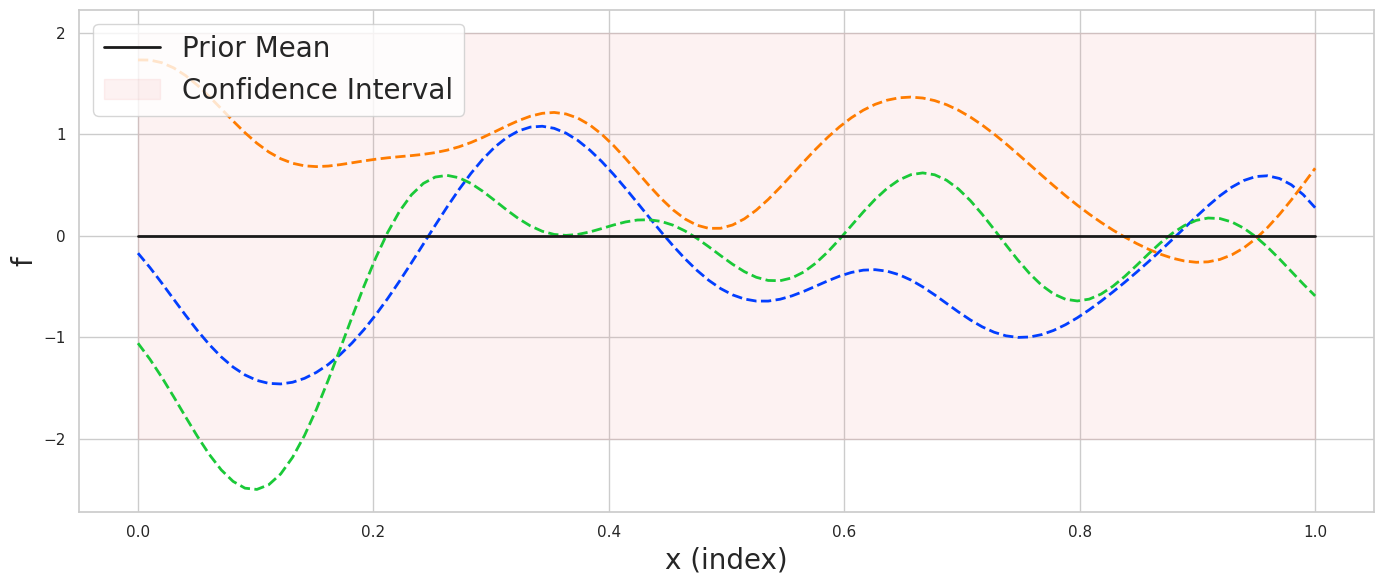

In [ ]:
np.random.seed(42)

def squared_exponential_kernel(a, b, param):
    square_distance = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * np.dot(a, b.T)
    return np.exp(-0.5 * square_distance / param**2)

x = np.linspace(0, 1, 100).reshape(-1, 1)

param = 0.1

K = squared_exponential_kernel(x, x, param)
y_prior = np.random.multivariate_normal(mean=np.zeros(100), cov=K, size=3).T

sns.set(style="whitegrid", palette="bright")

plt.figure(figsize=(14, 6))

prior_mean = np.zeros(x.shape[0])
prior_std = np.sqrt(np.diag(K))

plt.plot(x, prior_mean, 'k', lw=2, zorder=9, label='Prior Mean')

plt.fill_between(x.flatten(), prior_mean - 2 * prior_std, prior_mean + 2 * prior_std,
                 alpha=0.1, color='lightcoral', label='Confidence Interval')

for i in range(3):
    plt.plot(x, y_prior[:, i], linestyle='--', lw=2)

plt.xlabel("x (index)", fontsize=20)
plt.ylabel("f", fontsize=20)
plt.legend(fontsize=20, loc='upper left')
plt.tight_layout()
plt.show()

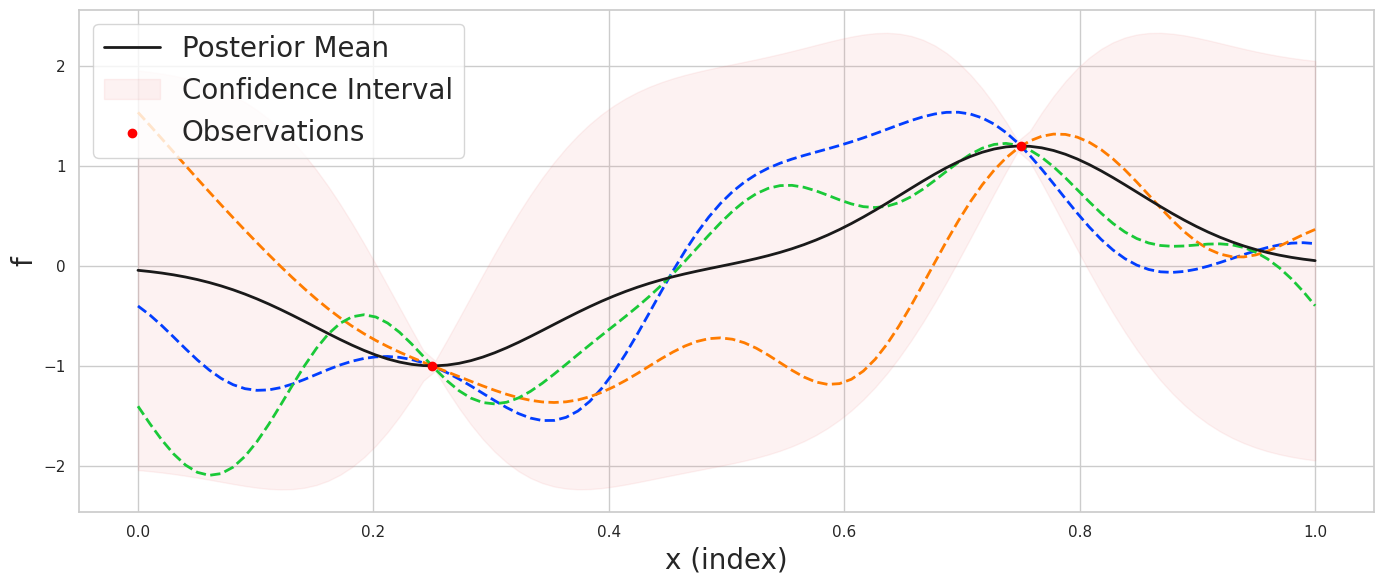

In [ ]:
np.random.seed(42)

def squared_exponential_kernel(a, b, param):
    square_distance = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-0.5 * square_distance / param**2)

x = np.linspace(0, 1, 100).reshape(-1, 1)

param = 0.1

x_obs = np.array([[0.25], [0.75]])
y_obs = np.array([[-1.0], [1.2]])

K_obs = squared_exponential_kernel(x_obs, x_obs, param)
K_s = squared_exponential_kernel(x, x_obs, param)
K = squared_exponential_kernel(x, x, param)  # Recompute K for consistency

K_inv = inv(K_obs + 1e-6*np.eye(len(x_obs)))  # Add a small noise term for numerical stability
posterior_mean = K_s.dot(K_inv).dot(y_obs).flatten()
posterior_cov = K - K_s.dot(K_inv).dot(K_s.T)
posterior_std = np.sqrt(np.diag(posterior_cov))

y_posterior = np.random.multivariate_normal(mean=posterior_mean, cov=posterior_cov, size=3).T

plt.figure(figsize=(14, 6))

sns.set(style="whitegrid", palette="bright")

plt.plot(x, posterior_mean, 'k', lw=2, zorder=9, label='Posterior Mean')

plt.fill_between(x.flatten(), posterior_mean - 2 * posterior_std, posterior_mean + 2 * posterior_std,
                 alpha=0.1, color='lightcoral', label='Confidence Interval')

for i in range(3):
    plt.plot(x, y_posterior[:, i], linestyle='--', lw=2)

plt.scatter(x_obs, y_obs, c='red', zorder=10, label='Observations')
plt.xlabel("x (index)", fontsize=20)
plt.ylabel("f", fontsize=20)
plt.legend(fontsize=20, loc='upper left')

plt.tight_layout()
plt.show()

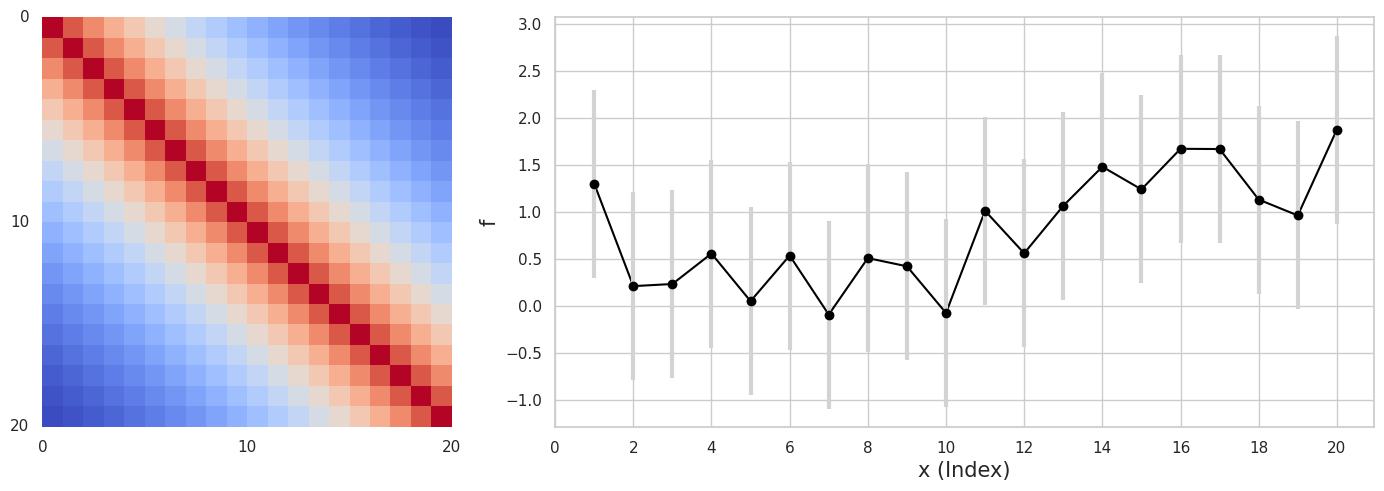

In [ ]:
num_points = 20
cov_matrix = np.exp(-0.1 * np.abs(np.subtract.outer(np.arange(num_points), np.arange(num_points))))

y_values = np.random.multivariate_normal(np.zeros(num_points), cov_matrix)
x_values = np.arange(1, num_points + 1)
error = np.full(num_points, np.diag(cov_matrix))


fig = plt.figure(figsize=(14, 5))

gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0])
sns.heatmap(cov_matrix, ax=ax0, cmap='coolwarm', square=True, cbar=False)

ticks = [0, 10, 20]
ax0.set_xticks(ticks)
ax0.set_yticks(ticks)
ax0.set_xticklabels(ticks, rotation=0)
ax0.set_yticklabels(ticks, rotation=0)

ax1 = fig.add_subplot(gs[1])
sns.scatterplot(x=x_values, y=y_values, color='blue', s=50)
sns.lineplot(x=x_values, y=y_values, color='black', marker='o')

ax1.errorbar(x=x_values, y=y_values, yerr=error, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

ax1.set_xticks(np.arange(0, 21, 2))
ax1.set_xlabel('x (Index)', fontsize = 15)
ax1.set_ylabel('f', fontsize = 15)

plt.tight_layout()
plt.show()


# CHAPTER 2 PLOTS

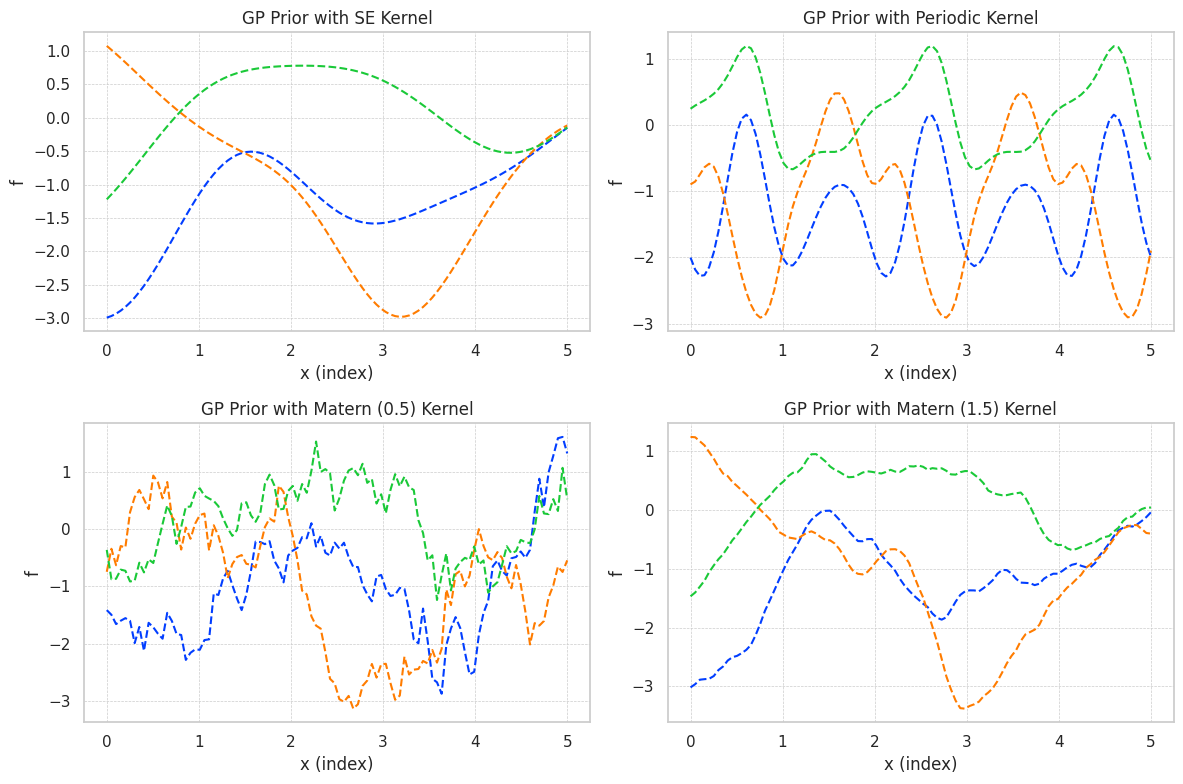

In [ ]:
sns.set(style="whitegrid", palette="bright")

kernels = {
    "SE": RBF(length_scale=1.0),
    "Periodic": ExpSineSquared(length_scale=1.0, periodicity=2.0),
    "Matern (0.5)": Matern(length_scale=1.0, nu=0.5),
    "Matern (1.5)": Matern(length_scale=1.0, nu=1.5),
}

X = np.linspace(0, 5, 100).reshape(-1, 1)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.flatten()

for ax, (name, kernel) in zip(axs, kernels.items()):
    # Create Gaussian Process with the specified kernel
    gp = GaussianProcessRegressor(kernel=kernel)

    y_samples = gp.sample_y(X, n_samples=3)

    for i in range(y_samples.shape[1]):
        sns.lineplot(x=X.ravel(), y=y_samples[:, i], ax=ax, linewidth=1.5, linestyle='--')

    ax.set_title(f'GP Prior with {name} Kernel')
    ax.set_xlabel('x (index)')
    ax.set_ylabel('f')
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

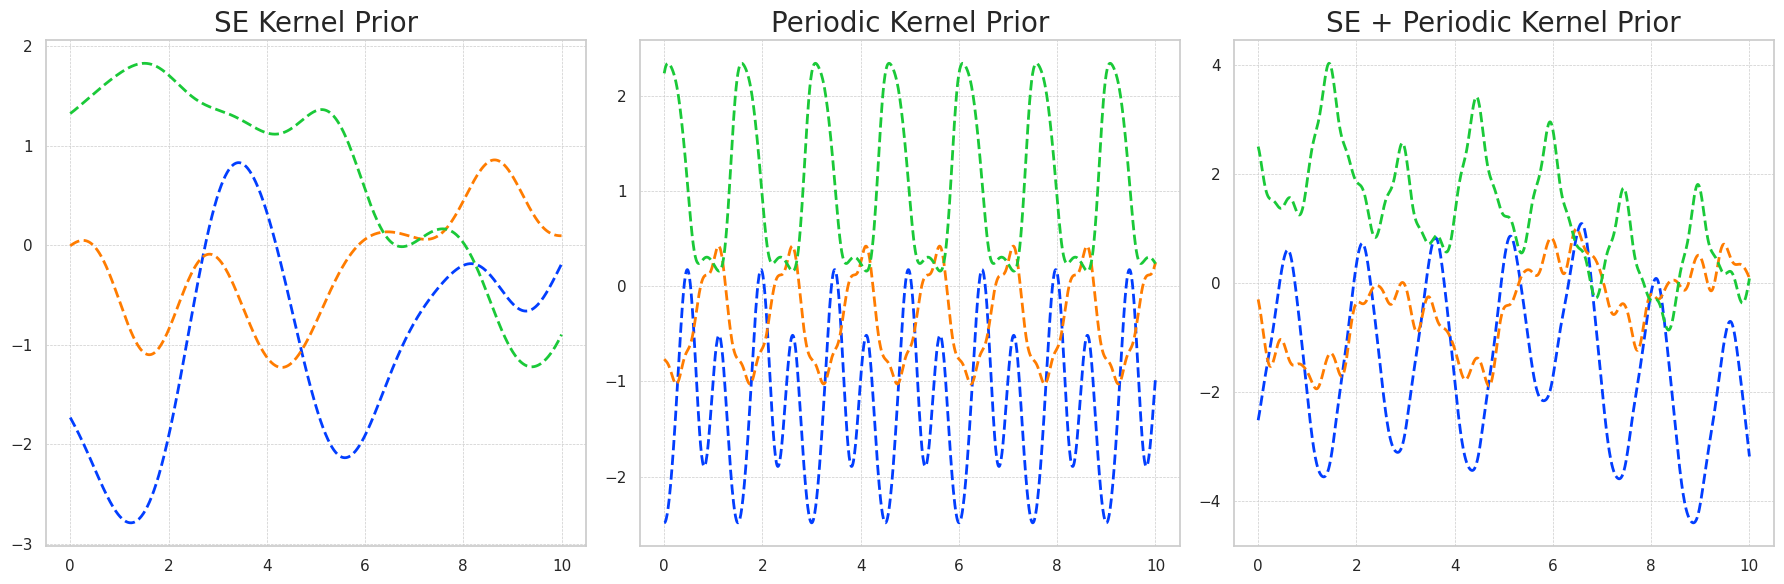

In [ ]:
kernel_se = RBF(length_scale=1.0)
kernel_periodic = ExpSineSquared(length_scale=1.0, periodicity=1.5)
kernel_combined = Sum(kernel_se, kernel_periodic)

gp_se = GaussianProcessRegressor(kernel=kernel_se, random_state=42)
gp_periodic = GaussianProcessRegressor(kernel=kernel_periodic, random_state=42)
gp_combined = GaussianProcessRegressor(kernel=kernel_combined, random_state=42)

X_test = np.atleast_2d(np.linspace(0, 10, 1000)).T

y_samples_se = gp_se.sample_y(X_test, n_samples=3)
y_samples_periodic = gp_periodic.sample_y(X_test, n_samples=3)
y_samples_combined = gp_combined.sample_y(X_test, n_samples=3)

sns.set(style="whitegrid", palette="bright")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
for i in range(y_samples_se.shape[1]):
    plt.plot(X_test, y_samples_se[:, i], linestyle='--', marker='', linewidth=2)
plt.title('SE Kernel Prior', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 3, 2)
for i in range(y_samples_periodic.shape[1]):
    plt.plot(X_test, y_samples_periodic[:, i], linestyle='--', marker='', linewidth=2)
plt.title('Periodic Kernel Prior', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 3, 3)
for i in range(y_samples_combined.shape[1]):
    plt.plot(X_test, y_samples_combined[:, i], linestyle='--', marker='', linewidth=2)
plt.title('SE + Periodic Kernel Prior', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

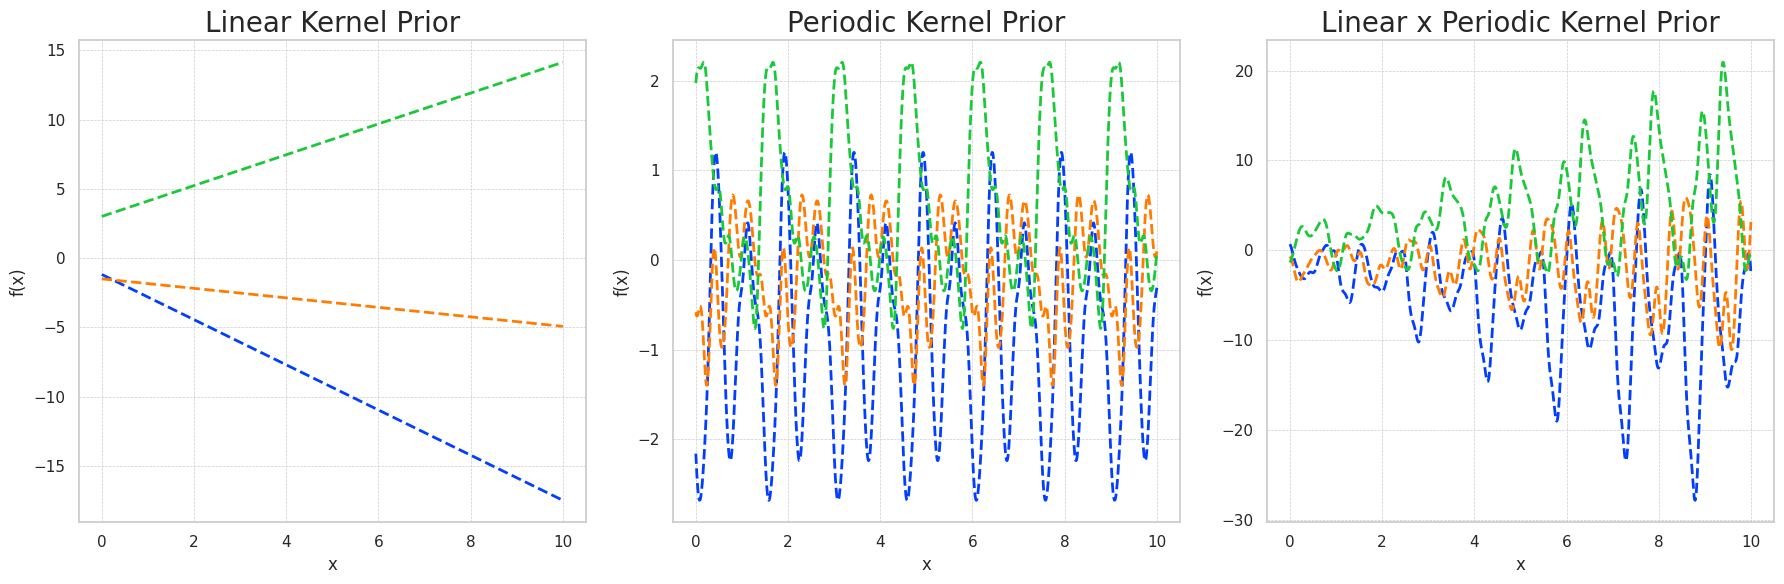

In [ ]:
sns.set(style="whitegrid", palette="bright")

kernel_linear = DotProduct(sigma_0=1.5)  # Linear kernel
kernel_periodic = ExpSineSquared(length_scale=0.5, periodicity=1.5)  # Periodic kernel

kernel_combined = Product(kernel_linear, kernel_periodic)

gp_linear = GaussianProcessRegressor(kernel=kernel_linear, random_state=42)
gp_periodic = GaussianProcessRegressor(kernel=kernel_periodic, random_state=42)
gp_combined = GaussianProcessRegressor(kernel=kernel_combined, random_state=42)

X_test = np.atleast_2d(np.linspace(0, 10, 1000)).T

y_samples_linear = gp_linear.sample_y(X_test, n_samples=3)
y_samples_periodic = gp_periodic.sample_y(X_test, n_samples=3)
y_samples_combined = gp_combined.sample_y(X_test, n_samples=3)

plt.figure(figsize=(18, 6))

samples_and_titles = [
    (y_samples_linear, 'Linear Kernel Prior'),
    (y_samples_periodic, 'Periodic Kernel Prior'),
    (y_samples_combined, 'Linear x Periodic Kernel Prior')
]

for i, (samples, title) in enumerate(samples_and_titles):
    plt.subplot(1, 3, i+1)
    for j in range(samples.shape[1]):
        sns.lineplot(x=X_test.ravel(), y=samples[:, j], linestyle='--', linewidth=2)
    plt.title(title, fontsize=20)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

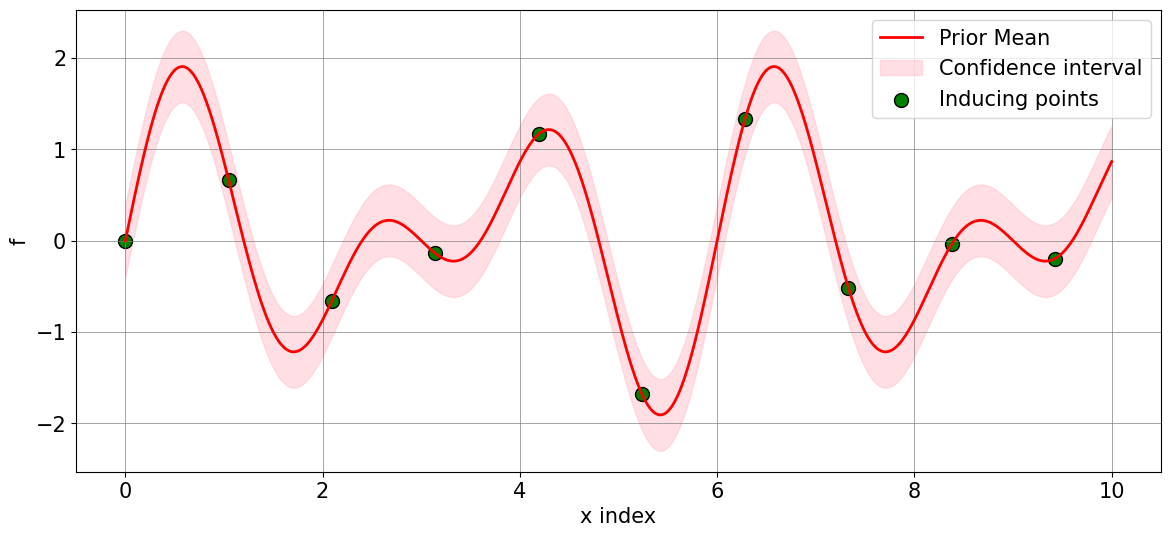

In [ ]:
np.random.seed(42)
X = np.linspace(0, 10, 1000)
y_true = np.sin(X * 2 * np.pi / 3) + np.sin(X * 2 * np.pi / 2)
y_std = np.full(X.shape, 0.2)  # Fixed standard deviation for all points

X_inducing = np.arange(0, 10, np.pi / 3)
y_inducing = np.sin(X_inducing * 2 * np.pi / 3) + np.sin(X_inducing * 2 * np.pi / 2)

plt.figure(figsize=(14, 6))
plt.plot(X, y_true, 'r-', lw=2, label='Prior Mean')
plt.fill_between(X, y_true - 1.96*y_std, y_true + 1.96*y_std, color='pink', alpha=0.5, label='Confidence interval')
plt.scatter(X_inducing, y_inducing, c='green', s=100, edgecolors='black', marker='o', label='Inducing points')

plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.gca().set_facecolor('white')

plt.xlabel('x index',fontsize=15)
plt.ylabel('f',fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.show()